In [1]:

import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline
import random
import math

In [2]:
import torchvision
import torchvision.transforms as transforms

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', device)

Device available now: cuda


In [4]:
image_transforms = transforms.Compose(
         [transforms.ToTensor(),
         transforms.CenterCrop(28),
         transforms.Normalize((0.5), (0.5))]
)

In [5]:
batchsize = 256
rowsize = 28
colsize = 28
inchannels = 3
kernelsize = 5
stride = 1
padding = 0
poolsize = 3
fc_size1 = 384
fc_size2 = 192
no_classes = 10
epochs = 30

In [6]:

train_ioc = []
test_ioc = 0
train_nn = []
noise = 40
test_nn = 0

In [7]:
train = torchvision.datasets.CIFAR10(root='./', train=True, download=True, transform=image_transforms)
test = torchvision.datasets.CIFAR10(root='./', train=False, transform=image_transforms)



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./


In [8]:
traindata = torch.utils.data.DataLoader(train,batch_size=batchsize, shuffle=True, num_workers=2,pin_memory=True)
testdata = torch.utils.data.DataLoader(test,batch_size=batchsize, shuffle=False, num_workers=2,pin_memory=True)

In [9]:
# for i,data in enumerate(traindata):
#   #data[0] , data[1]
#   for j in range(len(data)):
#     data[1][j] = random.randint(0, 9)

In [10]:
class IOC_CNN(nn.Module):
  def __init__(self,inchannels,kernelsize,stride,padding,poolsize,fc_size1,fc_size2,no_classes):
    super(IOC_CNN, self).__init__()
    self.conv1 = nn.Conv2d(inchannels,24,kernelsize,stride,padding)
    self.pool1 = nn.MaxPool2d(poolsize,2)
    self.BatchNorm1 = nn.BatchNorm2d(24)
    self.conv2 = nn.Conv2d(24,48,kernelsize,stride,padding)
    self.pool2 = nn.MaxPool2d(poolsize,2)
    self.BatchNorm2 = nn.BatchNorm2d(48)
    self.fc1 = nn.Linear(432,fc_size1)
    self.fc2 = nn.Linear(fc_size1,fc_size2)
    self.fc3 = nn.Linear(fc_size2,no_classes)


  def forward(self, x):
    x = F.elu(self.conv1(x))
    x = self.pool1(x)
    x = self.BatchNorm1(x)
    x = F.elu(self.conv2(x))
    x = self.pool2(x)
    x = self.BatchNorm2(x)
    x = torch.flatten(x,1)
    x = F.elu(self.fc1(x))
    x = F.elu(self.fc2(x))
    x = F.elu(self.fc3(x))
    return x

In [11]:
class NN_CNN(nn.Module):
  def __init__(self,inchannels,kernelsize,stride,padding,poolsize,fc_size1,fc_size2,no_classes):
    super(NN_CNN, self).__init__()
    self.conv1 = nn.Conv2d(inchannels,24,kernelsize,stride,padding)
    self.pool1 = nn.MaxPool2d(poolsize,2)
    self.BatchNorm1 = nn.BatchNorm2d(24)
    self.conv2 = nn.Conv2d(24,48,kernelsize,stride,padding)
    self.pool2 = nn.MaxPool2d(poolsize,2)
    self.BatchNorm2 = nn.BatchNorm2d(48)
    self.fc1 = nn.Linear(432,fc_size1)
    self.fc2 = nn.Linear(fc_size1,fc_size2)
    self.fc3 = nn.Linear(fc_size2,no_classes)


  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)
    x = self.BatchNorm1(x)
    x = F.relu(self.conv2(x))
    x = self.pool2(x)
    x = self.BatchNorm2(x)
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x

In [12]:
ioc_model = IOC_CNN(inchannels,kernelsize,stride,padding,poolsize,fc_size1,fc_size2,no_classes).to(device)
nn_model = NN_CNN(inchannels,kernelsize,stride,padding,poolsize,fc_size1,fc_size2,no_classes).to(device)
# model = SimpleAlex(no_classes).to(device)

In [13]:
ioc_optimizer = torch.optim.Adam(ioc_model.parameters(),lr= 0.0001)
nn_optimizer = torch.optim.Adam(nn_model.parameters(),lr= 0.0001)
criterion = nn.CrossEntropyLoss().to(device)

In [14]:

for i in range(epochs):
  Loss = 0
  num_correct=0
  tot = 0
  for i,data in enumerate(traindata):
    # iterating through every batch
    x_data = data[0].to(device)
    labels = data[1].to(device)
    ioc_optimizer.zero_grad()
    outputs = ioc_model(x_data)
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
    loss = criterion(outputs, labels)
    loss.backward()
    ioc_optimizer.step()
    Loss += loss
    for w in ioc_model.parameters():
      p = w
      torch.where(w > 0, w, torch.exp(p))
  train_ioc.append(num_correct/tot)    
  print("Accuracy for exponentiation on negative weights : ",num_correct/tot)
  print("Loss for exponentiation on negative weights : ",loss.item())
  

Accuracy for exponentiation on negative weights :  0.40886
Loss for exponentiation on negative weights :  1.3564835786819458
Accuracy for exponentiation on negative weights :  0.53408
Loss for exponentiation on negative weights :  1.252694845199585
Accuracy for exponentiation on negative weights :  0.57426
Loss for exponentiation on negative weights :  1.2707403898239136
Accuracy for exponentiation on negative weights :  0.599
Loss for exponentiation on negative weights :  1.0735055208206177
Accuracy for exponentiation on negative weights :  0.61608
Loss for exponentiation on negative weights :  0.9594575762748718
Accuracy for exponentiation on negative weights :  0.63312
Loss for exponentiation on negative weights :  1.091764211654663
Accuracy for exponentiation on negative weights :  0.64528
Loss for exponentiation on negative weights :  0.923671543598175
Accuracy for exponentiation on negative weights :  0.65732
Loss for exponentiation on negative weights :  1.152258276939392
Accura

In [15]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testdata:
        images = images.to(device)
        labels = labels.to(device)
        outputs = ioc_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_ioc = correct/total
    print("Test Accuracy for exponentiation of weights for IOC Architecture : ",100 * correct / total)



Test Accuracy for exponentiation of weights for IOC Architecture :  67.83


In [16]:

for i in range(epochs):
  Loss = 0
  num_correct=0
  tot = 0
  for i,data in enumerate(traindata):
    # iterating through every batch
    x_data = data[0].to(device)
    labels = data[1].to(device)
    nn_optimizer.zero_grad()
    outputs = nn_model(x_data)
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
    loss = criterion(outputs, labels)
    loss.backward()
    nn_optimizer.step()
    Loss += loss
  train_nn.append(num_correct/tot)    
  print("Accuracy for exponentiation on negative weights : ",num_correct/tot)
  print("Loss for exponentiation on negative weights : ",loss.item())
  

Accuracy for exponentiation on negative weights :  0.35272
Loss for exponentiation on negative weights :  1.3281663656234741
Accuracy for exponentiation on negative weights :  0.52292
Loss for exponentiation on negative weights :  1.408016562461853
Accuracy for exponentiation on negative weights :  0.57898
Loss for exponentiation on negative weights :  0.9345755577087402
Accuracy for exponentiation on negative weights :  0.60984
Loss for exponentiation on negative weights :  1.0051276683807373
Accuracy for exponentiation on negative weights :  0.63312
Loss for exponentiation on negative weights :  0.9098650813102722
Accuracy for exponentiation on negative weights :  0.65458
Loss for exponentiation on negative weights :  1.0401300191879272
Accuracy for exponentiation on negative weights :  0.66984
Loss for exponentiation on negative weights :  0.8447504043579102
Accuracy for exponentiation on negative weights :  0.68624
Loss for exponentiation on negative weights :  0.8085700869560242
A

In [17]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testdata:
        images = images.to(device)
        labels = labels.to(device)
        outputs = nn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    test_nn = correct/total
    print("Test Accuracy for exponentiation of weights with NN Architecture : ",100 * correct / total)



Test Accuracy for exponentiation of weights with NN Architecture :  68.17


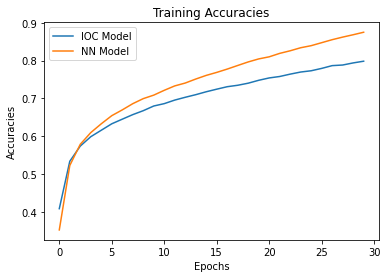

In [18]:
import matplotlib.pyplot as plt
epoch_numbers = np.arange(0,epochs,1)
plt.title("Training Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.plot(epoch_numbers,train_ioc,label='IOC Model')
plt.plot(epoch_numbers,train_nn,label='NN Model')     
plt.legend()
plt.show()           

In [19]:
print("Generalization Gap for NN Model",(train_nn[len(train_nn)-1]*100)-(test_nn*100))
print("Generalization Gap for IOC Model",(train_ioc[len(train_ioc)-1]*100)-(test_ioc*100))

Generalization Gap for NN Model 19.328000000000003
Generalization Gap for IOC Model 12.015999999999991
